In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
match_data = pd.read_csv('C:\\Users\\Facu\\PycharmProjects\\Proyecto_Final_IA\\proyecto_final\\data\\matchDataProcessed.csv')
wins = pd.read_csv('C:\\Users\\Facu\\PycharmProjects\\Proyecto_Final_IA\\proyecto_final\\data\\matchDataWins.csv')

In [5]:
win_team1 = pd.DataFrame(wins['win_team1'])
win_team2 = pd.DataFrame(wins['win_team2'])

In [9]:
# Elimina las columnas de firstBaron de los datos
match_data = match_data.drop(['firstBaronTeam1', 'firstBaronTeam2'], axis=1)

In [10]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
predictors = match_data
predictors_train, predictors_test, wins_team1_train, wins_team1_test = train_test_split(predictors, win_team1, test_size=0.2, random_state=42)

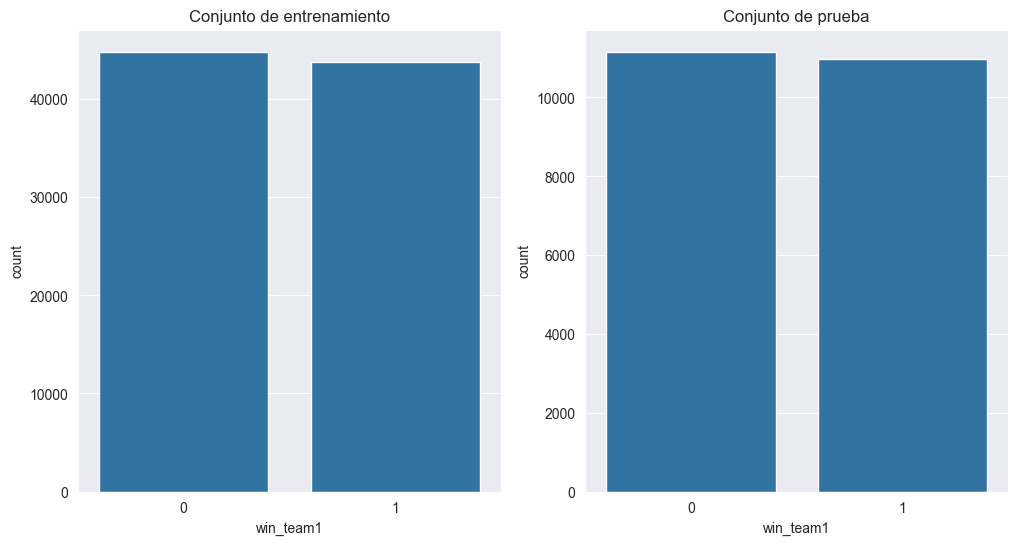

In [11]:
# graficar la cantidad de victorias y derrotas en el conjunto de entrenamiento y prueba
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='win_team1', data=wins_team1_train, ax=ax[0])
ax[0].set_title('Conjunto de entrenamiento')
sns.countplot(x='win_team1', data=wins_team1_test, ax=ax[1])
ax[1].set_title('Conjunto de prueba')
plt.show()

In [12]:
# Configuración del clasificador XGBoost
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42,enable_categorical=True,eval_metric='logloss',use_label_encoder=False)

In [13]:
model.fit(predictors_train, wins_team1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [14]:
wins_pred_test = model.predict(predictors_test)
wins_pred_train = model.predict(predictors_train)

Accuracy: 0.7340017161179605
Precision: 0.7357162700250023
Recall: 0.7235224478644933
F1 score: 0.7295684113865932 

Matriz de Confusión:
             Predicted Win  Predicted Lose
Actual Win            8308            2854
Actual Lose           3036            7945


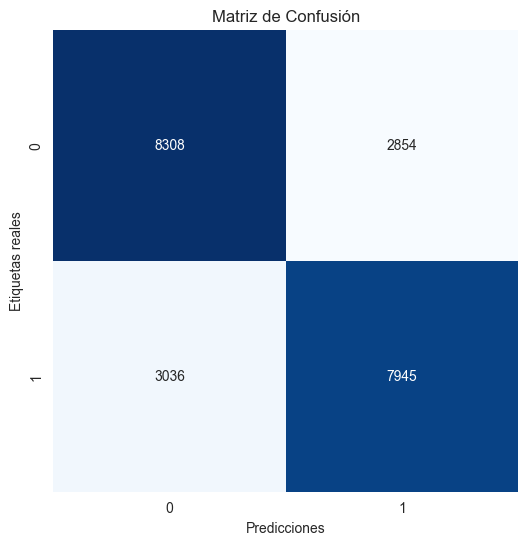

In [21]:
# Evaluación del rendimiento del modelo para el conjunto de prueba
accuracy = accuracy_score(wins_team1_test, wins_pred_test)
print(f'Accuracy: {accuracy}')

precision = precision_score(wins_team1_test, wins_pred_test)
print(f'Precision: {precision}')

recall = recall_score(wins_team1_test, wins_pred_test)
print(f'Recall: {recall}')

f1 = f1_score(wins_team1_test, wins_pred_test)
print(f'F1 score: {f1} \n')

# Crear la matriz de confusión para datos de prueba del team1
conf_matrix = confusion_matrix(wins_team1_test, wins_pred_test)

# Crear un DataFrame de pandas para visualizar mejor la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Win', 'Actual Lose'], columns=['Predicted Win', 'Predicted Lose'])

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_df)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(wins_pred_test),
            yticklabels=np.unique(wins_team1_test))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

Accuracy: 0.8375540526809001
Precision: 0.8390650622444973
Recall: 0.830396123339962
F1 score: 0.8347080853801437 

Matriz de Confusión:
             Predicted Win  Predicted Lose
Actual Win           37854            6968
Actual Lose           7420           36329


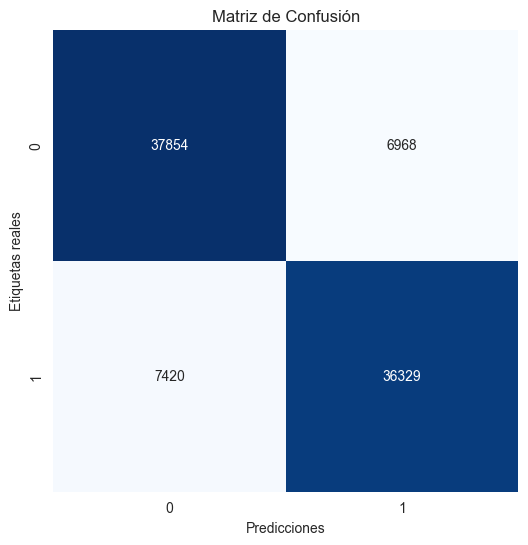

In [24]:
# Evaluacion del rendimiento del modelo para el conjunto de entrenamiento
accuracy = accuracy_score(wins_team1_train, wins_pred_train)
print(f'Accuracy: {accuracy}')

precision = precision_score(wins_team1_train, wins_pred_train)
print(f'Precision: {precision}')

recall = recall_score(wins_team1_train, wins_pred_train)
print(f'Recall: {recall}')

f1 = f1_score(wins_team1_train, wins_pred_train)
print(f'F1 score: {f1} \n')

# Crear la matriz de confusión para datos de prueba del team1
conf_matrix = confusion_matrix(wins_team1_train, wins_pred_train)

# Crear un DataFrame de pandas para visualizar mejor la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Win', 'Actual Lose'], columns=['Predicted Win', 'Predicted Lose'])

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_df)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(wins_pred_train),
            yticklabels=np.unique(wins_team1_train))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

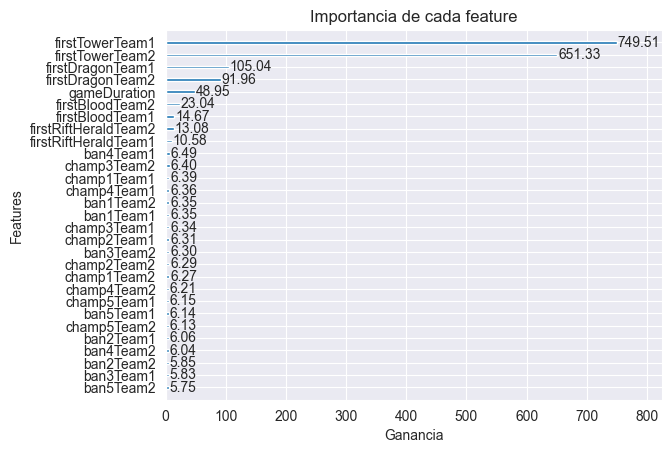

In [37]:
# Mostramos la importancia de cada feature
xgb.plot_importance(model, importance_type='gain', values_format='{v:.2f}', xlabel='Ganancia', ylabel='Features', title='Importancia de cada feature')
plt.show()